# KDE approach  (DR3)

<h5 style="text-align:right; margin-right:15px"> 2024-01-02 13:51</h5>

Not applying ML, so no fit to targets to generate prediction model. Instead we compute KDE probability density distributions
for the ML targets, which we then apply to the unid and bcu associations.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc99a23b3d0>

## Introduction
The classification schemes that we have been using are misleading for the Unid's. 
The following features are problematic for classifying the Unids.
* Flux, or $Fp$: the Unids are mostly low flux, a threshold effect for known sources but apparently 
a feature of the possible new component.
* Curvature: Unid curvatures are much higher, either science, or as Jean believes, a systematic 
for curved weak sources (which option can be resolved with a gtobssim study.)
* Softness, or $Ep$: the Unids have a large soft component, not reflected in the target populations
The fact there is an Unid component not in the targets violates the basic ML assumption, 
as is evident in the pulsar probability plots that I posted above. Using the pulsar prediction, 
assuming that it was also selecting this new population, underestimates this component.
Thus we use a simpler approach: calculate KDE probabilities for the three targets using 
only the two spectral shape parameters curvature and Ep  (after removing those with significant 
variability) . I've been applying this to the "pulsar" selection to isolate 
the `msp` and `psr` subsets.
This only presumes that the shape is independent of the flux.

### Data selection cut: "0.15<Ep<4 & d>0.2 & variability<25"

group,blazar,msp,psr,unid
all,2127,147,143,2179
selected,168,144,135,1366


### Spectral shape plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc999b57730>
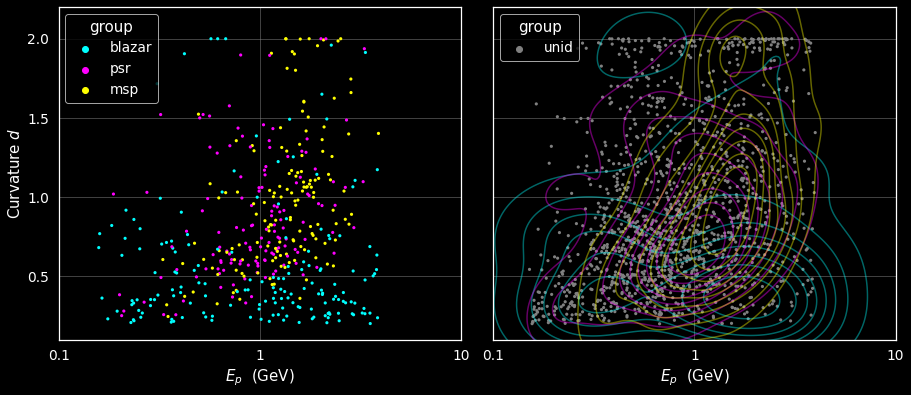

### Flux plots

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc9980b1390>
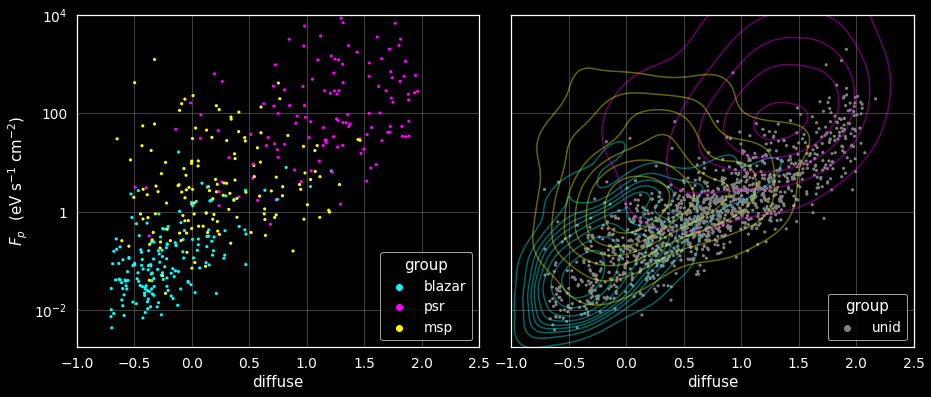

In [1]:
%run pylib/ml_fit dr3  show dark kde

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc999f1caf0>
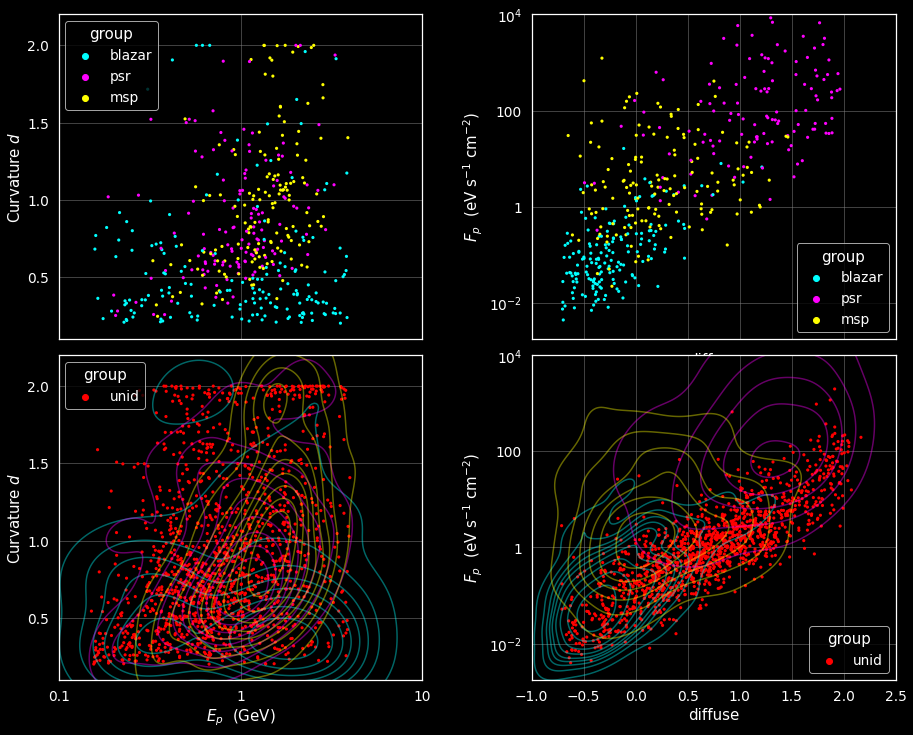

In [2]:
show_fig(plot_kde_density,self,dfc, palette=['red'] )

In [3]:
def apply_kde(self, df=None, features=None):
    from pylib.kde import Gaussian_kde
    if df is None: df = self.df.copy() 
    if features is None: features=self.features
    for name, sdf in df.groupby('group'):
        gde = Gaussian_kde(sdf,  features)
        u = gde(df)
        df[name+'_kde'] = u
    return df
kde_vars = 'd log_epeak log_fpeak diffuse'.split()
show(f"""## Create KDE functions 
Using variables {kde_vars}""")
apply_kde(self, dfc, kde_vars);

## Create KDE functions 
Using variables ['d', 'log_epeak', 'log_fpeak', 'diffuse']

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fc975e79e10>
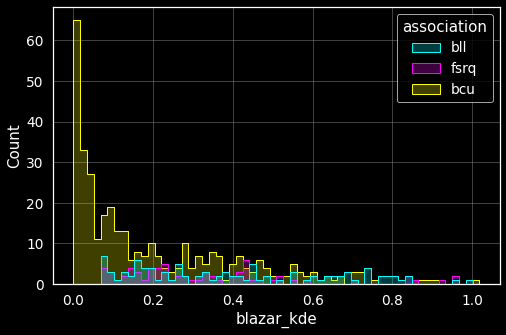

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=dfc, ax=ax, x='blazar_kde', hue='association', hue_order='bll fsrq bcu'.split(), palette=self.palette,
             element='step')
show(fig)

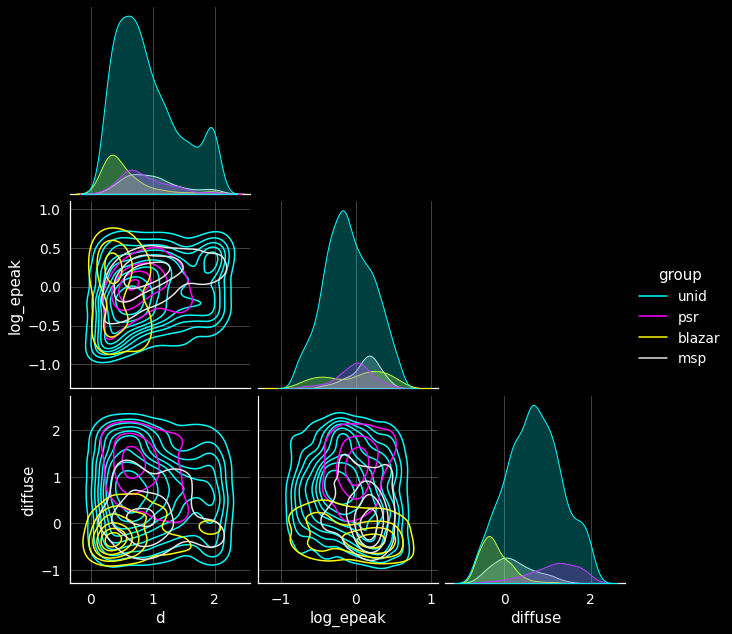

In [5]:
sns.pairplot(dfc, hue='group', vars = 'd log_epeak diffuse'.split(), palette=self.palette + ['0.9'],
             kind='kde',
            height=3, corner=True);

In [6]:
kde_vars = 'd log_epeak log_fpeak diffuse'.split()
show(f"""## Create KDE functions 
Using variables {kde_vars}""")

## Create KDE functions 
Using variables ['d', 'log_epeak', 'log_fpeak', 'diffuse']

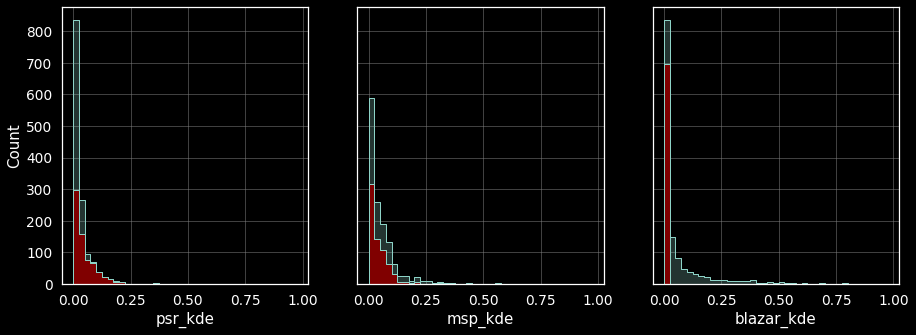

In [7]:
fig, axx = plt.subplots(ncols=3, figsize=(15,5), sharex=True, sharey=True)
kw=dict( element='step', bins=np.arange(0,1,0.025), hue='group', log_scale=(False,False), legend=False)
dfu = dfc[dfc.group=='unid']
for name, ax in zip('psr msp blazar'.split(), axx.flat):#    if name=='unid': continue
    sns.histplot(dfu, ax=ax, x=name+'_kde', **kw);
    sns.histplot(dfu.query('blazar_kde<0.01'), ax=ax, x=name+'_kde', facecolor='maroon',**kw);

## Construct likelihood of msp, psr, blazar

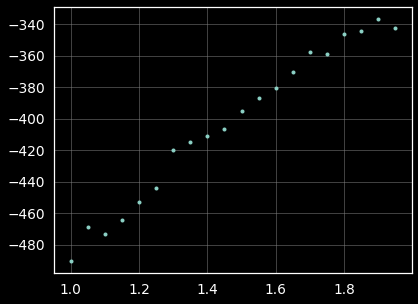

In [8]:
show(f"""## Construct likelihood of msp, psr, blazar
""")
class Likelihood:
    def __init__(self, df,  vars, cols ='msp_kde psr_kde blazar_kde unid_kde'.split() ):
        # generate KDE functions and calculate for the Unids
        df = apply_kde(self, df, vars)
        self.kde_vals = df.loc[df.group=='unid', cols]

    def __call__(self, x):
        a = np.atleast_1d(x)
        b = 1-sum(a)
        K = self.kde_vals
        KA,KU = K.iloc[:,:-1], K.iloc[:,-1]
        t = (a*KA).sum(axis=1)
        u = b*KU
        return np.sum(np.log(t+u))
     

ll = Likelihood(dfc, vars='d log_epeak log_fpeak diffuse'.split())
xx = np.arange(1,2,0.05)
yy = [ll([2,x,1]) for x in xx ]

plt.plot(xx,yy, '.');

In [9]:
show(f'Sums:')
pd.Series(t.sum(axis=0), name="Sums")

Sums:

NameError: name 't' is not defined

In [ ]:
show("---")
from sklearn.neighbors import KernelDensity
KernelDensity

In [ ]:
sns.scatterplot(dfu.query('blazar_kde<0.01'), x='psr_kde',y='msp_kde', s=10);

In [ ]:
show(sns.scatterplot(dfc, x='msp_kde', y='blazar_kde', s=10).figure)

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
kw =dict(x='log_epeak', y='d', s=10, hue='group', edgecolor='none' )
sns.kdeplot(dfc, ax=ax, hue_order=self.target_names,  **kw, alpha=0.6,
                   palette=self.palette, );
t = sns.scatterplot(dfc,ax=ax, hue_order=['unid'], **kw, palette=['yellow']);
ax.set(**epeak_kw(), yticks=np.arange(0.5,2.1,0.5), ylabel='Curvature ${d}$');

In [ ]:
apply_kde(self, dfc, 'd log_epeak log_fpeak diffuse'.split())
sns.scatterplot(dfc, x='pulsar_kde', y='blazar_kde', s=10);

In [ ]:
from seaborn.relational import _ScatterPlotter

In [ ]:
%run pylib/kde
gde = Gaussian_kde(dfc,  cols=self.features)
gde

In [ ]:
gde

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(10,8), sharex=True, sharey=True,
                             gridspec_kw=dict(wspace=0.08))
kw =dict(x='log_epeak', y='d', s=25,  edgecolor='none' )
cmap = 'jet'
sns.scatterplot(dfc[dfc.group=='unid'], ax=ax, **kw, hue='kde_asymmetry',# hue_norm=np.arange(-1,1,0.2),
                palette='RdBu',              #  hue_norm= plt.Normalize(-1,1),
           );
ax.set(**epeak_kw(), yticks=np.arange(0.5,2.1,0.5));
show(fig)

In [ ]:
show(dfc.groupby('target').size())
show(f'Unids in selection: {len(dfcu)}')
df4 = apply_kde(self, df=dfc)
df3 = apply_kde(self, df=dfc, features='d log_epeak log_var'.split()) 

In [ ]:
def kde_scatter_plots(self, df=None):
    """KDE scatter plots.
    """
    if df is None: df = self.df
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
    kw = dict( s=10,  x='pulsar_kde', y='blazar_kde', palette=self.palette, edgecolor='none')
    sns.scatterplot(df, ax=ax1, hue='target', **kw);
    sns.scatterplot(df, ax=ax2, hue='association', hue_order='bcu unid'.split(), **kw);
    return fig
show_fig(kde_scatter_plots, self, df=df4)
show_fig(kde_scatter_plots, self, df=df3)

In [ ]:
def plot_asymmetry(self, df=None): 
    """Asymmetry histograms.
    """
    if df is None: df = self.df
    kw = dict( x='kde_asymmetry', bins=np.arange(-1,1.01, 0.05),
              palette=self.palette,log_scale=(False, True),element='step')
    fig, axx = plt.subplots(nrows=3, figsize=(8,8), sharex=True,
                           gridspec_kw=dict(hspace=0.05))
    sns.histplot(df, ax=axx[0], hue='target', **kw);
    for ax, assoc in zip(axx[1:], 'bcu unid'.split()):
        sns.histplot(df, ax=ax, hue='association', hue_order=[assoc], **kw)
    axx[-1].set(xticks=np.arange(-1,1.01, 0.5))
    return fig
show_fig(plot_asymmetry,self, df4)

In [ ]:
def ecdf_plots(self, df=None, ax=None, **kwargs):
    """ECDF plots.
    """
    if df is None: df=self.df
    fig, ax = plt.subplots(figsize=(8,4)) if ax is None else (ax.figure, ax)
    
    kw = dict(data=df, ax=ax,  x='kde_asymmetry', palette=self.palette)#, legend=False)
    kw.update(kwargs)
    sns.ecdfplot(hue='association',hue_order='msp psr unid fsrq bll'.split(),**kw)
    ax.set(ylim=(0,1.05),xticks=np.arange(-1,1.01, 0.5), yticks=np.arange(0,1.01,0.2) )
    return fig

show("""### ECDF with and without flux""")
fig, ax = plt.subplots(figsize=(8,6))
ecdf_plots( self, df=df4, ax=ax, )
# ecdf_plots( self, df=df3, ax=ax, ls='--')
show(fig)

In [ ]:
show(pd.Series(df3.groupby('target').size(), name='count'))

fig, ax = plt.subplots(figsize=(8,4))
kw = dict(hue='target',  x='kde_asymmetry', lw=1, 
          # element='step', bins=np.linspace(0,1,26), log_scale=(False,True),
         palette = self.palette)
# sns.ecdfplot(df4, ax=ax,**kw)
sns.ecdfplot(df3, ax=ax, **kw, ls='--', legend=False, )


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip", hue="size",
                     palette='RdBu', data=tips)

# norm = plt.Normalize(tips['size'].min(), tips['size'].max())
# sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
# sm.set_array([])

# # Remove the legend and add a colorbar
# ax.get_legend().remove()
# ax.figure.colorbar(sm)

plt.show()